In [1]:
import numpy as np
import numpy.random as npr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# import math

from scipy import optimize
from scipy import stats
from matplotlib.ticker import MultipleLocator, MaxNLocator

%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

BOLD = '\033[1m'
END = '\033[0m'
npr.seed(123)

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Minima of the six-hump camelback function 
=>  [-1.704  0.796]  [-1.607 -0.569]  [-0.09   0.713]  [ 0.09  -0.713]  [1.607 0.569]  [ 1.704 -0.796]

Six-hump camelback function values at the minima 
=>  -0.21546  2.10425  -1.03163  -1.03163  2.10425  -0.21546

Global minima of the six-hump camelback function 
=>  [-0.09   0.713]  [ 0.09  -0.713]
=>  Value of the function: -1.03163





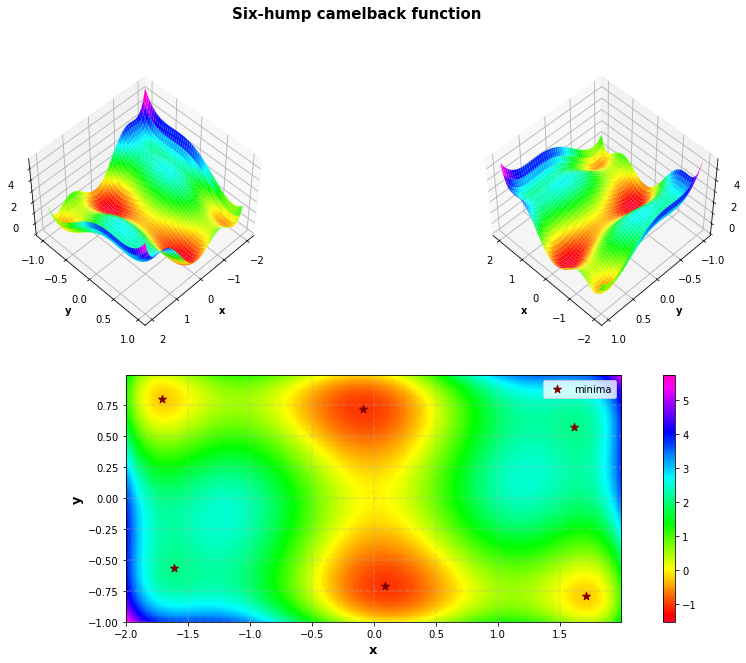

In [2]:
def f(x):
    return(4.0-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2+x[0]*x[1]+(4.0*x[1]**2-4)*x[1]**2


x0 = np.arange(-2, 2, 0.01)
x1 = np.arange(-1, 1, 0.01)
x0, x1 = np.meshgrid(x0, x1, sparse = True) 
z = f([x0, x1])
z_min, z_max = z.min()-0.5, z.max()

minima = np.empty((0, 2))
for i in range(200):
    x_ini = [npr.uniform(-2, 2), npr.uniform(-1, 1)]
    minimum = optimize.minimize(f, x_ini)
    minima = np.append(minima, minimum["x"])  
    
minima = np.unique(np.round(np.reshape(minima, (-1,2)), 3), axis = 0)
z_minima = [f(minimum).round(5) for minimum in minima]
sort = np.argsort(z_minima)[:2]
print(BOLD + "Minima of the six-hump camelback function \n=>" + END, *minima, sep = "  ")
print(BOLD + "\nSix-hump camelback function values at the minima \n=>" + END, *z_minima, sep = "  ")
print(BOLD + "\nGlobal minima of the six-hump camelback function \n=> " + END, minima[sort[0]], "", minima[sort[1]])
print(BOLD + "=>  Value of the function:" + END, z_minima[sort[0]])
print("\n\n")


fig = plt.figure(figsize = (15, 10))
fig.suptitle("Six-hump camelback function", fontweight = "bold", fontsize = 15)

ax = fig.add_subplot(221, projection = "3d")
ax.plot_surface(x0, x1, z, cmap = "gist_rainbow")
ax.set_xlabel("x", fontweight = "bold")
ax.set_ylabel("y", fontweight = "bold")
ax.zaxis.set_major_locator(MultipleLocator(2))
ax.zaxis.set_minor_locator(MultipleLocator(1))
ax.view_init(50, 45)

ax = fig.add_subplot(222, projection='3d')
ax.plot_surface(x0, x1, z, cmap = "gist_rainbow")
ax.set_xlabel("x", fontweight = "bold")
ax.set_ylabel("y", fontweight = "bold")
ax.zaxis.set_major_locator(MultipleLocator(2))
ax.zaxis.set_minor_locator(MultipleLocator(1))
ax.view_init(50, 135)

ax = fig.add_subplot(212)
image = ax.imshow(z, cmap = "gist_rainbow", vmin = z_min, vmax = z_max, extent = [x0.min(), x0.max(), x1.min(), x1.max()],
                    interpolation = "nearest", origin = "lower")
ax.scatter(minima.T[0], minima.T[1], c = "maroon", marker = "*", s = 70, label = "minima")
ax.set_xlabel("x", fontweight = "bold", fontsize = 13)
ax.set_ylabel("y", fontweight = "bold", fontsize = 13)
ax.grid(linestyle = "--", linewidth = 1.5, alpha = 0.3)
ax.legend()
plt.colorbar(image)
plt.show()

**What happens for an initial guess of $(𝑥,𝑦)=(0,0)$?**
$\newline$ We find as minimum the value $(0,0)$ that is not: this is due to the fact that quasi-Newton method like BFGS cannot escape saddle points which are mistaken for minimum in higher dimension than one. (Functions $f:R^{n}\rightarrow R$ with $n>1$)

In [3]:
print(optimize.minimize(f, [0,0]), "\n\n")

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.]) 




2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [4]:
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
maxima = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
minima = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
tss_max = np.sum((np.mean(maxima) - maxima)**2)
tss_min = np.sum((np.mean(minima) - minima)**2)
x = np.linspace(0, 11, 100)

def gaussian_fit(x, h, A, mu, sig):
    return h + A*np.exp(-0.5*np.power((x-mu)/sig, 2))

def cauchy_fit(x, h, A, x0, gamma):
    return h + A/(1 + np.power((x-x0)/gamma, 2))


				Maxima parameters - Gaussian Fit
Height: h = 15.78 ± 1.18
Amplitude: A = 23.09 ± 1.15
Mean: mu = 5.74 ± 0.08
Standard Deviation: sig = 2.29 ± 0.17
Correlation coefficient: R^2 = 0.9859 
			 R = 0.9929


				Minima parameters - Gaussian Fit
Height: h = -61.32 ± 1.19
Amplitude: A = 52.65 ± 1.40
Mean: mu = 6.16 ± 0.05
Standard Deviation: sig = 1.98 ± 0.08
Correlation coefficient: R^2 = 0.9946 
			 R = 0.9973 



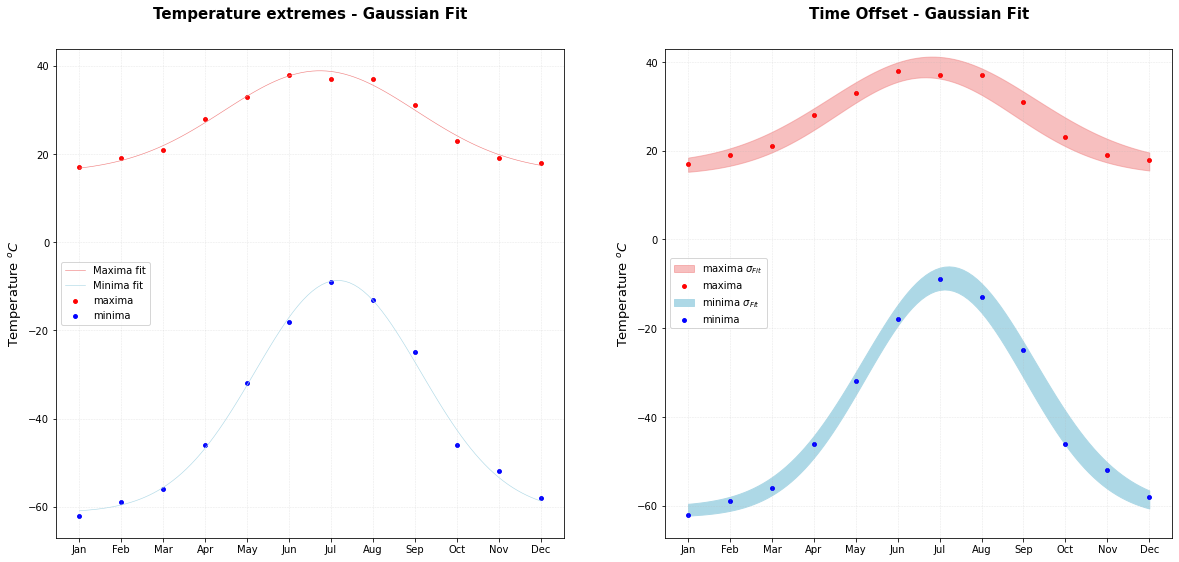

In [5]:
popt, pcov = optimize.curve_fit(gaussian_fit, range(12), maxima, p0 = [20, 25, 6, 3], method = "lm", full_output = False)
gauss_param = pd.DataFrame( np.dstack((popt, np.sqrt(np.diag(pcov)) )).reshape(1,8), 
                           columns = ["h", "std_h", "A", "std_A", "mu", "std_mu", "sig", "std_sig"], index = ["max"])
print(BOLD + "\n\t\t\t\tMaxima parameters - Gaussian Fit" + END)
print(BOLD + "Height:"  + END + " h = %.2f \u00B1 %.2f" % (gauss_param["h"]["max"], gauss_param["std_h"]["max"]))
print(BOLD + "Amplitude:"  + END + " A = %.2f \u00B1 %.2f" % (gauss_param["A"]["max"], gauss_param["std_A"]["max"]))
print(BOLD + "Mean:"  + END + " mu = %.2f \u00B1 %.2f" % (gauss_param["mu"]["max"], gauss_param["std_mu"]["max"]))
print(BOLD + "Standard Deviation:"  + END + " sig = %.2f \u00B1 %.2f" % (gauss_param["sig"]["max"], gauss_param["std_sig"]["max"]))
ssr_max_gauss = np.sum((maxima - gaussian_fit(range(12), *popt))**2)
rsq_max_gauss = 1 - ssr_max_gauss / tss_max
print(BOLD + "Correlation coefficient: " + END + "R^2 = %.4f" %rsq_max_gauss, "\n\t\t\t R = %.4f" %np.sqrt(rsq_max_gauss))

fig, ax = plt.subplots(1, 2, figsize = (20, 9))
ax[0].set_title("Temperature extremes - Gaussian Fit", y = 1, pad = 30, fontsize = 15, weight = "bold")
ax[0].set_ylabel("Temperature $^oC$", fontsize = 13)
ax[0].scatter(month, maxima, c = "r", s = 15, label = "maxima")
ax[0].plot(x, gaussian_fit(x, *popt), label = "Maxima fit", linewidth = 0.6, color = "lightcoral")
plus = gaussian_fit(x, *(popt + np.sqrt(np.diag(pcov))))
minus = gaussian_fit(x, *(popt - np.sqrt(np.diag(pcov))))
ax[1].set_title("Time Offset - Gaussian Fit", y = 1, pad = 30, fontsize = 15, weight = "bold")
ax[1].set_ylabel("Temperature $^oC$", fontsize = 13)
ax[1].fill_between(x, minus, plus, color = "lightcoral", alpha = 0.5, label = "maxima $\sigma_{Fit}$")
ax[1].scatter(month, maxima, c = "r", s = 15, label = "maxima")


popt, pcov = optimize.curve_fit(gaussian_fit, range(12), minima,  p0 = [-60, 50, 6, 1], method = "lm", full_output = False)
gauss_param = gauss_param.append(pd.DataFrame( np.dstack((popt, np.sqrt(np.diag(pcov)) )).reshape(1,8),
                           columns = ["h", "std_h", "A", "std_A", "mu", "std_mu", "sig", "std_sig"], index = ["min"]))
print(BOLD + "\n\n\t\t\t\tMinima parameters - Gaussian Fit" + END)
print(BOLD + "Height:"  + END + " h = %.2f \u00B1 %.2f" % (gauss_param["h"]["min"], gauss_param["std_h"]["min"]))
print(BOLD + "Amplitude:"  + END + " A = %.2f \u00B1 %.2f" % (gauss_param["A"]["min"], gauss_param["std_A"]["min"]))
print(BOLD + "Mean:"  + END + " mu = %.2f \u00B1 %.2f" % (gauss_param["mu"]["min"], gauss_param["std_mu"]["min"]))
print(BOLD + "Standard Deviation:"  + END + " sig = %.2f \u00B1 %.2f" % (gauss_param["sig"]["min"], gauss_param["std_sig"]["min"]))
ssr_min_gauss = np.sum((minima - gaussian_fit(range(12), *popt))**2)
rsq_min_gauss = 1 - ssr_min_gauss / tss_min
print(BOLD + "Correlation coefficient: " + END + "R^2 = %.4f" %rsq_min_gauss, "\n\t\t\t R = %.4f" %np.sqrt(rsq_min_gauss), "\n")

ax[0].scatter(month, minima, c = "b", s = 15, label = "minima")
ax[0].plot(x, gaussian_fit(x, *popt), label = "Minima fit", linewidth = 0.6, c = "lightblue")
ax[0].grid(linestyle = "--", linewidth = 0.5, alpha = 0.3)
ax[0].legend(loc = "center left")
plus = gaussian_fit(x, *(popt + np.sqrt(np.diag(pcov))))
minus = gaussian_fit(x, *(popt - np.sqrt(np.diag(pcov))))
ax[1].fill_between(x, minus, plus, color = "lightblue", label = "minima $\sigma_{Fit}$")
ax[1].scatter(month, minima, c = "b", s = 15, label = "minima")
ax[1].grid(linestyle = "--", linewidth = 0.5, alpha = 0.3)
ax[1].legend(loc = "center left")
plt.show()

print("\n\n")


				Maxima parameters - Cauchy Fit
Height: h = 7.51 ± 3.13
Amplitude: A = 31.48 ± 2.82
Mean: x0 = 5.73 ± 0.10
Gamma: γ = 3.53 ± 0.48
Correlation coefficient: R^2 = 0.9795 
			 R = 0.9897


				Minima parameters - Cauchy Fit
Height: h = -74.19 ± 2.84
Amplitude: A = 66.67 ± 2.64
Mean: x0 = 6.17 ± 0.06
Gamma: γ = 2.72 ± 0.21
Correlation coefficient: R^2 = 0.9916 
			 R = 0.9958 



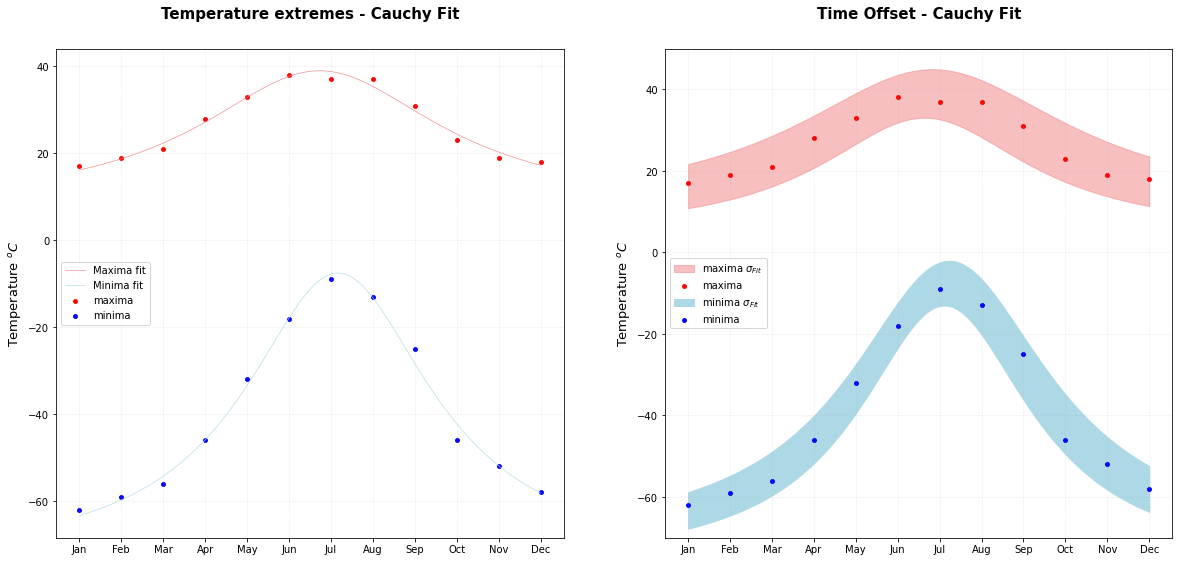

In [6]:
popt, pcov = optimize.curve_fit(cauchy_fit, range(12), maxima, p0 = [20, 25, 6, 3], method = "lm", full_output = False)
cauchy_param = pd.DataFrame( np.dstack((popt, np.sqrt(np.diag(pcov)) )).reshape(1,8), 
                           columns = ["h", "std_h", "A", "std_A", "x0", "std_x0", "γ", "std_γ"], index = ["max"])
print(BOLD + "\n\t\t\t\tMaxima parameters - Cauchy Fit" + END)
print(BOLD + "Height:"  + END + " h = %.2f \u00B1 %.2f" % (cauchy_param["h"]["max"], cauchy_param["std_h"]["max"]))
print(BOLD + "Amplitude:"  + END + " A = %.2f \u00B1 %.2f" % (cauchy_param["A"]["max"], cauchy_param["std_A"]["max"]))
print(BOLD + "Mean:"  + END + " x0 = %.2f \u00B1 %.2f" % (cauchy_param["x0"]["max"], cauchy_param["std_x0"]["max"]))
print(BOLD + "Gamma:"  + END + " γ = %.2f \u00B1 %.2f" % (cauchy_param["γ"]["max"], cauchy_param["std_γ"]["max"]))
ssr_max_cauchy = np.sum((maxima - cauchy_fit(range(12), *popt))**2)
rsq_max_cauchy = 1 - ssr_max_cauchy / tss_max
print(BOLD + "Correlation coefficient: " + END + "R^2 = %.4f" %rsq_max_cauchy, "\n\t\t\t R = %.4f" %np.sqrt(rsq_max_cauchy))

fig, ax = plt.subplots(1, 2, figsize = (20, 9))
ax[0].set_title("Temperature extremes - Cauchy Fit", y = 1, pad = 30, fontsize = 15, weight = "bold")
ax[0].set_ylabel("Temperature $^oC$", fontsize = 13)
ax[0].scatter(month, maxima, c = "r", s = 15, label = "maxima")
ax[0].plot(x, cauchy_fit(x, *popt), label = "Maxima fit", linewidth = 0.6, color = "lightcoral")
plus = cauchy_fit(x, *(popt + np.sqrt(np.diag(pcov))))
minus = cauchy_fit(x, *(popt - np.sqrt(np.diag(pcov))))
ax[1].set_title("Time Offset - Cauchy Fit", y = 1, pad = 30, fontsize = 15, weight = "bold")
ax[1].set_ylabel("Temperature $^oC$", fontsize = 13)
ax[1].fill_between(x, minus, plus, color = "lightcoral", alpha = 0.5, label = "maxima $\sigma_{Fit}$")
ax[1].scatter(month, maxima, c = "r", s = 15, label = "maxima")


popt, pcov = optimize.curve_fit(cauchy_fit, range(12), minima,  p0 = [-60, 50, 6, 1], method = "lm", full_output = False)
cauchy_param = cauchy_param.append(pd.DataFrame( np.dstack((popt, np.sqrt(np.diag(pcov)) )).reshape(1,8),
                           columns = ["h", "std_h", "A", "std_A", "x0", "std_x0", "γ", "std_γ"], index = ["min"]))
print(BOLD + "\n\n\t\t\t\tMinima parameters - Cauchy Fit" + END)
print(BOLD + "Height:"  + END + " h = %.2f \u00B1 %.2f" % (cauchy_param["h"]["min"], cauchy_param["std_h"]["min"]))
print(BOLD + "Amplitude:"  + END + " A = %.2f \u00B1 %.2f" % (cauchy_param["A"]["min"], cauchy_param["std_A"]["min"]))
print(BOLD + "Mean:"  + END + " x0 = %.2f \u00B1 %.2f" % (cauchy_param["x0"]["min"], cauchy_param["std_x0"]["min"]))
print(BOLD + "Gamma:"  + END + " γ = %.2f \u00B1 %.2f" % (cauchy_param["γ"]["min"], cauchy_param["std_γ"]["min"]))
ssr_min_cauchy = np.sum((minima - cauchy_fit(range(12), *popt))**2)
rsq_min_cauchy = 1 - ssr_min_cauchy / tss_min
print(BOLD + "Correlation coefficient: " + END + "R^2 = %.4f" %rsq_min_cauchy, "\n\t\t\t R = %.4f" %np.sqrt(rsq_min_cauchy), "\n")

ax[0].scatter(month, minima, c = "b", s = 15, label = "minima")
ax[0].plot(x, cauchy_fit(x, *popt), label = "Minima fit", linewidth = 0.6, c = "lightblue")
ax[0].grid(linestyle = "--", linewidth = 0.5, alpha = 0.3)
ax[0].legend(loc = "center left")
plus = cauchy_fit(x, *(popt + np.sqrt(np.diag(pcov))))
minus = cauchy_fit(x, *(popt - np.sqrt(np.diag(pcov))))
ax[1].fill_between(x, minus, plus, color = "lightblue", label = "minima $\sigma_{Fit}$")
ax[1].set_ylim([-70, 50])
ax[1].scatter(month, minima, c = "b", s = 15, label = "minima")
ax[1].grid(linestyle = "--", linewidth = 0.5, alpha = 0.3)
ax[1].legend(loc = "center left")
plt.show()

print("\n\n")

**Is the fit reasonable? If not, why?**
$\newline$ All the fits seem to be reasonable under the $R^{2}$'s value point of view: all $R^{2}$ are in fact very close to one. In particular the best model is the gaussian's one: its $R^{2}$ value is closer to one than the cauchy's model in either maxima and minima temperature cases.

In [7]:
def lambd(param, fit_model):
    
    if(fit_model == "cauchy"):
        a = cauchy_param[param]["max"]
        b = cauchy_param[param]["min"]
        sig_a = cauchy_param["std_" + param]["max"]
        sig_b = cauchy_param["std_" + param]["min"]
    elif(fit_model == "gauss"):
        a = gauss_param[param]["max"]
        b = gauss_param[param]["min"]
        sig_a = gauss_param["std_" + param]["max"]
        sig_b = gauss_param["std_" + param]["min"]
    
    lambd = np.abs(a - b)/np.sqrt(sig_a**2 + sig_b**2)
    return lambd


lambd_h = lambd("h", "gauss")
lambd_A = lambd("A", "gauss")
lambd_mu = lambd("mu", "gauss")
lambd_sig = lambd("sig", "gauss")
print(BOLD + "\n\t\t\t\tCompatibility - Gauss Fit" + END)
print(BOLD + "Height:"  + END + " λ = %.1f" % lambd_h)
print(BOLD + "Amplitude:"  + END + " λ = %.1f" % lambd_A)
print(BOLD + "Mean:"  + END + " λ = %.1f" % lambd_mu)
print(BOLD + "Standard Deviation:"  + END + " λ = %.1f" % lambd_sig)


lambd_h = lambd("h", "cauchy")
lambd_A = lambd("A", "cauchy")
lambd_x0 = lambd("x0", "cauchy")
lambd_γ = lambd("γ", "cauchy")
print(BOLD + "\n\n\t\t\t\tCompatibility - Cauchy Fit" + END)
print(BOLD + "Height:"  + END + " λ = %.1f" % lambd_h)
print(BOLD + "Amplitude:"  + END + " λ = %.1f" % lambd_A)
print(BOLD + "Mean:"  + END + " λ = %.1f" % lambd_x0)
print(BOLD + "Gamma:"  + END + " λ = %.1f" % lambd_γ, "\n\n")


				Compatibility - Gauss Fit
Height: λ = 46.1
Amplitude: λ = 16.3
Mean: λ = 4.6
Standard Deviation: λ = 1.7


				Compatibility - Cauchy Fit
Height: λ = 19.3
Amplitude: λ = 9.1
Mean: λ = 3.9
Gamma: λ = 1.5 




**Is the time offset for min and max temperatures the same within the fit accuracy?**
$\newline$ From the previous plots we can observe that the time offsets of minima and maxima temperature configurations are included by the fit parameters accuracies for either the gaussian and the cauchy model.
$\newline$ To understand if they are the same or not (or at least compatible between each other) we compute:

$$
\lambda = \frac{a-b}{\sqrt{\sigma_a^2+\sigma_b^2}}
$$

between the maxima and the minima parameters (excluding the height $h$ parameter which does not step in this case and for sure yields to a compatibility $\lambda_h>>1$). So then we got:

- <ins>**Gauss Model**</ins>: 
<table>
<thead>    
    <tr><th>   </th><th> Amplitude $\lambda_A$</th><th>Mean $\lambda_{\mu}$</th><th>Standerd Deviation$\lambda_{\sigma}$</th></tr>
</thead>
<tbody>
    <tr><td>   </td><td> 16.3</td><td>4.6</td><td>1.7</td></tr>
</tbody>
<tbody>
    <tr><th> Compatible? </th><td> False</td><td>False</td><td>True</td></tr>
</tbody>
</table>
$\newline$

- <ins>**Cauchy Model**</ins>: 
<table>
<thead>    
    <tr><th>   </th><th> Amplitude $\lambda_A$</th><th>Mean $\lambda_{x_0}$</th><th>Standerd Deviation$\lambda_{\gamma}$</th></tr>
</thead>
<tbody>
    <tr><td>   </td><td>9.1</td><td>3.9</td><td>1.5</td></tr>
</tbody>
<tbody>
    <tr><th> Compatible? </th><td> False</td><td>False</td><td>True</td></tr>
</tbody>
</table>
$\newline$
$\newline$

$\Rightarrow$ Only $\sigma$ and $\gamma$ parameters are compatible within the fit accuracies for minima and maxima temperatures.

$\newline$
$\newline$



3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [8]:
# ! wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl

data = np.load("residuals_261.pkl", allow_pickle = True).item()["residuals"]
data = data[(data > -2) & (data < 2)]



				Parameters - Gaussian Fit
Height: h = 98.85 ± 25.73
Amplitude: A = 3186.14 ± 85.04
Mean: mu = -0.09 ± 0.007
Standard Deviation: sig = 0.23 ± 0.007
Correlation coefficient: R^2 = 0.9916 
			 R = 0.9958



				Parameters - Cauchy Fit
Height: h = -45.77 ± 18.02
Amplitude: A = 3723.61 ± 67.90
Mean: x0 = -0.09 ± 0.003
Gamma: γ = 0.22 ± 0.007
Correlation coefficient: R^2 = 0.9974 
			 R = 0.9987





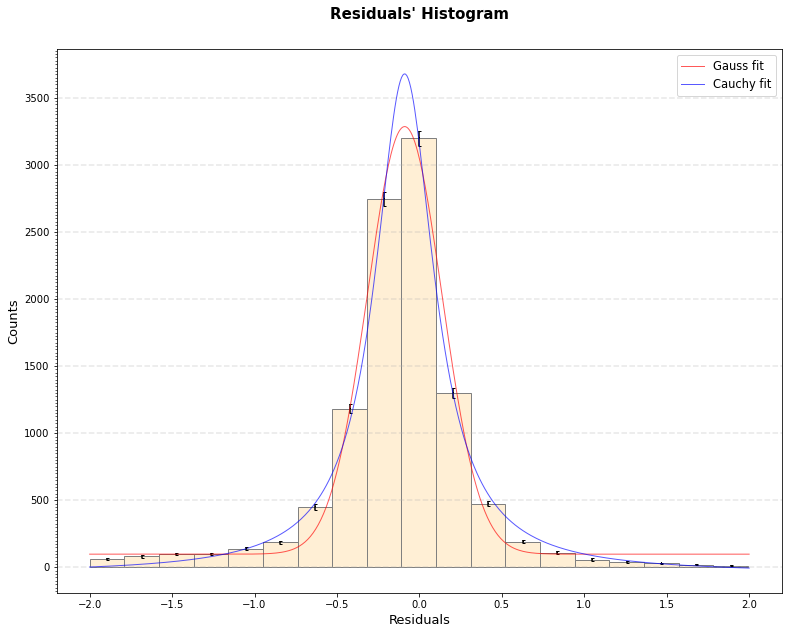

In [9]:
fig, ax = plt.subplots(figsize = (13, 10))

counts, bins, _ = ax.hist(data, bins = "doane", facecolor = "papayawhip", edgecolor = "gray")                                                     
bin_centers = bins[:-1] + 0.5*np.diff(bins)
Poissons = np.round(np.sqrt(counts), 3) 
ax.errorbar(bin_centers, counts, yerr = Poissons, fmt = ",k", capsize = 1.5)
ax.set_xlabel("Residuals", fontsize = 13)
ax.set_ylabel("Counts", fontsize = 13)
ax.yaxis.set_minor_locator(MultipleLocator(25))
ax.grid(axis = "y", linestyle = '--', linewidth = 1.5, alpha = 0.3)

x = np.linspace(-2, 2, 500)
tss = np.sum((np.mean(counts) - counts)**2)

popt_gauss, pcov = optimize.curve_fit(gaussian_fit, bin_centers, counts, method = "lm", full_output = False)
ax.plot(x, gaussian_fit(x, *popt_gauss), label = "Gauss fit", c = "r", lw = 1, alpha = 0.65)
print(BOLD + "\n\n\t\t\t\tParameters - Gaussian Fit" + END)
print(BOLD + "Height:"  + END + " h = %.2f \u00B1 %.2f" % (popt_gauss[0], np.sqrt(pcov[0,0])))
print(BOLD + "Amplitude:"  + END + " A = %.2f \u00B1 %.2f" % (popt_gauss[1], np.sqrt(pcov[1,1])))
print(BOLD + "Mean:"  + END + " mu = %.2f \u00B1 %.3f" % (popt_gauss[2], np.sqrt(pcov[2,2])))
print(BOLD + "Standard Deviation:"  + END + " sig = %.2f \u00B1 %.3f" % (popt_gauss[3], np.sqrt(pcov[3,3])))
ssr_gauss = np.sum((counts - gaussian_fit(bin_centers, *popt_gauss))**2)
rsq_gauss = 1 - ssr_gauss / tss
print(BOLD + "Correlation coefficient: " + END + "R^2 = %.4f" %rsq_gauss, "\n\t\t\t R = %.4f" %np.sqrt(rsq_gauss))


popt_cauchy, pcov = optimize.curve_fit(cauchy_fit, bin_centers, counts, method = "lm", full_output = False)
ax.plot(x, cauchy_fit(x, *popt_cauchy), label = "Cauchy fit", c = "b", lw = 1, alpha = 0.65)
print(BOLD + "\n\n\n\t\t\t\tParameters - Cauchy Fit" + END)
print(BOLD + "Height:"  + END + " h = %.2f \u00B1 %.2f" % (popt_cauchy[0], np.sqrt(pcov[0,0])))
print(BOLD + "Amplitude:"  + END + " A = %.2f \u00B1 %.2f" % (popt_cauchy[1], np.sqrt(pcov[1,1])))
print(BOLD + "Mean:"  + END + " x0 = %.2f \u00B1 %.3f" % (popt_cauchy[2], np.sqrt(pcov[2,2])))
print(BOLD + "Gamma:"  + END + " γ = %.2f \u00B1 %.3f" % (popt_cauchy[3], np.sqrt(pcov[3,3])))
ssr_cauchy = np.sum((counts - cauchy_fit(bin_centers, *popt_cauchy))**2)
rsq_cauchy = 1 - ssr_cauchy / tss
print(BOLD + "Correlation coefficient: " + END + "R^2 = %.4f" %rsq_cauchy, "\n\t\t\t R = %.4f" %np.sqrt(rsq_cauchy))


print("\n\n")
ax.set_title("Residuals' Histogram", y = 1, pad = 30, fontsize = 15, weight = "bold")
ax.legend(prop={"size": 11.5})
plt.show()


Degrees of freedom: n = 18

Gauss Fit
=> Chi-square:  𝜒^2 = 1333.44
=> p-value: p = 0.0000

Cauchy Fit
=> Chi-square:  𝜒^2 = 246.26
=> p-value: p = 0.0000 




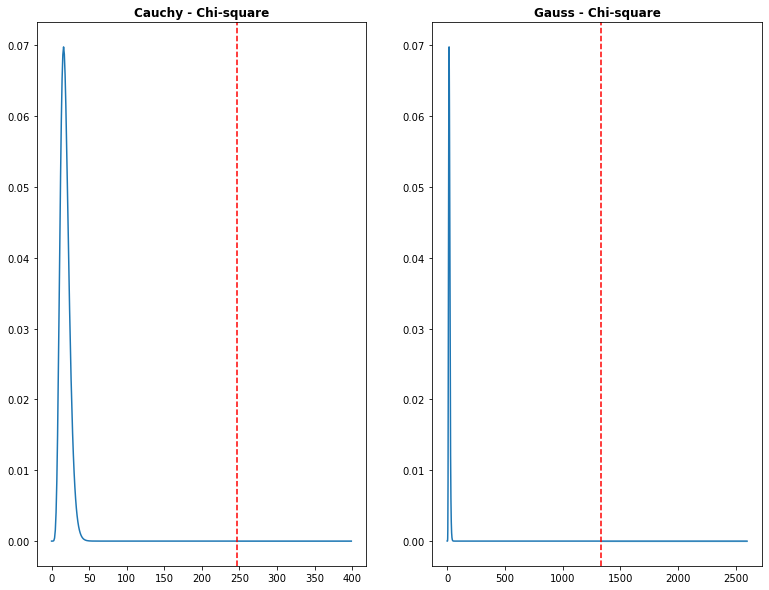

In [10]:
ndof = len(bin_centers) - 1
print(BOLD + "\nDegrees of freedom: " + END + "n =", ndof)

chi2_gauss = np.sum(((counts - gaussian_fit(bin_centers, *popt_gauss))**2) / counts)
pvalue_gauss = 1. - stats.chi2.cdf(chi2_gauss, ndof)
print(BOLD + "\nGauss Fit" + END)
print(BOLD + "=> Chi-square: " + END + " 𝜒^2 = %.2f" %chi2_gauss)
print(BOLD + "=> p-value: " + END + "p = %.4f" %pvalue_gauss)

chi2_cauchy = np.sum(((counts - cauchy_fit(bin_centers, *popt_cauchy))**2) / counts)
pvalue_cauchy = 1. - stats.chi2.cdf(chi2_cauchy, ndof)
print(BOLD + "\nCauchy Fit" + END)
print(BOLD + "=> Chi-square: " + END + " 𝜒^2 = %.2f" %chi2_cauchy)
print(BOLD + "=> p-value: " + END + "p = %.4f" %pvalue_cauchy, "\n\n")


fig, ax = plt.subplots(1, 2, figsize = (13, 10))
x = np.arange(0, 400, 1)
ax[0].plot(x, stats.chi2.pdf(x, ndof))
ax[0].axvline(chi2_cauchy, color = "r", linestyle = "--")
ax[0].fill_between(x, stats.chi2.pdf(x, ndof), where = x > chi2_cauchy, color ="lightblue")
ax[0].set_title("Cauchy - Chi-square", weight = "bold")

x = np.arange(0, 2600, 1)
ax[1].plot(x, stats.chi2.pdf(x, ndof))
ax[1].axvline(chi2_gauss, color = "r", linestyle = "--")
ax[1].fill_between(x, stats.chi2.pdf(x, ndof), where = x > chi2_gauss, color ="lightblue")
ax[1].set_title("Gauss - Chi-square", weight = "bold")
plt.show()

**Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?**
$\newline$ The p-value in either cases is smaller than whatsoever confidence level $p_{value} = 0 < 0.05 = \alpha$ so the fits are not satisfactory at all and we can confidently say that  the two fit functions are not adequate in this instance. This is likely due to the fact that the lorenzian and the gaussian don't follow the trend of the tails of residual's distribution, in fact performing the same analysis in a restricted range we obtain the following.

$\newline$

In [11]:
data = np.load("residuals_261.pkl", allow_pickle = True).item()["residuals"]
data = data[(data > -0.8) & (data < 0.8)]



				Parameters - Gaussian Fit
Height: h = 112.90 ± 19.85
Amplitude: A = 1352.14 ± 33.17
Mean: mu = -0.09 ± 0.005
Standard Deviation: sig = 0.20 ± 0.007
Correlation coefficient: R^2 = 0.9918 
			 R = 0.9959



				Parameters - Cauchy Fit
Height: h = -91.17 ± 19.66
Amplitude: A = 1620.96 ± 23.66
Mean: x0 = -0.09 ± 0.003
Gamma: γ = 0.24 ± 0.008
Correlation coefficient: R^2 = 0.9970 
			 R = 0.9985





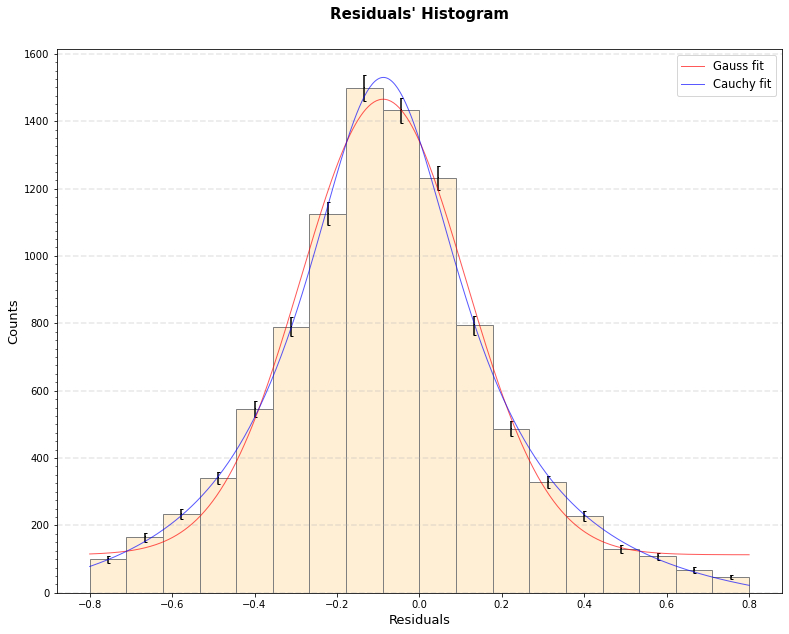

In [12]:
fig, ax = plt.subplots(figsize = (13, 10))

counts, bins, _ = ax.hist(data, bins = "doane", facecolor = "papayawhip", edgecolor = "gray")                                                     
bin_centers = bins[:-1] + 0.5*np.diff(bins)
Poissons = np.round(np.sqrt(counts), 3) 
ax.errorbar(bin_centers, counts, yerr = Poissons, fmt = ",k", capsize = 1.5)
ax.set_xlabel("Residuals", fontsize = 13)
ax.set_ylabel("Counts", fontsize = 13)
ax.yaxis.set_minor_locator(MultipleLocator(25))
ax.grid(axis = "y", linestyle = '--', linewidth = 1.5, alpha = 0.3)

x = np.linspace(-0.8, 0.8, 500)
tss = np.sum((np.mean(counts) - counts)**2)

popt_gauss, pcov = optimize.curve_fit(gaussian_fit, bin_centers, counts, method = "lm", full_output = False)
ax.plot(x, gaussian_fit(x, *popt_gauss), label = "Gauss fit", c = "r", lw = 1, alpha = 0.65)
print(BOLD + "\n\n\t\t\t\tParameters - Gaussian Fit" + END)
print(BOLD + "Height:"  + END + " h = %.2f \u00B1 %.2f" % (popt_gauss[0], np.sqrt(pcov[0,0])))
print(BOLD + "Amplitude:"  + END + " A = %.2f \u00B1 %.2f" % (popt_gauss[1], np.sqrt(pcov[1,1])))
print(BOLD + "Mean:"  + END + " mu = %.2f \u00B1 %.3f" % (popt_gauss[2], np.sqrt(pcov[2,2])))
print(BOLD + "Standard Deviation:"  + END + " sig = %.2f \u00B1 %.3f" % (popt_gauss[3], np.sqrt(pcov[3,3])))
ssr_gauss = np.sum((counts - gaussian_fit(bin_centers, *popt_gauss))**2)
rsq_gauss = 1 - ssr_gauss / tss
print(BOLD + "Correlation coefficient: " + END + "R^2 = %.4f" %rsq_gauss, "\n\t\t\t R = %.4f" %np.sqrt(rsq_gauss))


popt_cauchy, pcov = optimize.curve_fit(cauchy_fit, bin_centers, counts, method = "lm", full_output = False)
ax.plot(x, cauchy_fit(x, *popt_cauchy), label = "Cauchy fit", c = "b", lw = 1, alpha = 0.65)
print(BOLD + "\n\n\n\t\t\t\tParameters - Cauchy Fit" + END)
print(BOLD + "Height:"  + END + " h = %.2f \u00B1 %.2f" % (popt_cauchy[0], np.sqrt(pcov[0,0])))
print(BOLD + "Amplitude:"  + END + " A = %.2f \u00B1 %.2f" % (popt_cauchy[1], np.sqrt(pcov[1,1])))
print(BOLD + "Mean:"  + END + " x0 = %.2f \u00B1 %.3f" % (popt_cauchy[2], np.sqrt(pcov[2,2])))
print(BOLD + "Gamma:"  + END + " γ = %.2f \u00B1 %.3f" % (popt_cauchy[3], np.sqrt(pcov[3,3])))
ssr_cauchy = np.sum((counts - cauchy_fit(bin_centers, *popt_cauchy))**2)
rsq_cauchy = 1 - ssr_cauchy / tss
print(BOLD + "Correlation coefficient: " + END + "R^2 = %.4f" %rsq_cauchy, "\n\t\t\t R = %.4f" %np.sqrt(rsq_cauchy))


print("\n\n")
ax.set_title("Residuals' Histogram", y = 1, pad = 30, fontsize = 15, weight = "bold")
ax.legend(prop={"size": 11.5})
plt.show()


Degrees of freedom: n = 17

Gauss Fit
=> Chi-square:  𝜒^2 = 186.41
=> p-value: p = 0.0000

Cauchy Fit
=> Chi-square:  𝜒^2 = 22.41
=> p-value: p = 0.1694 




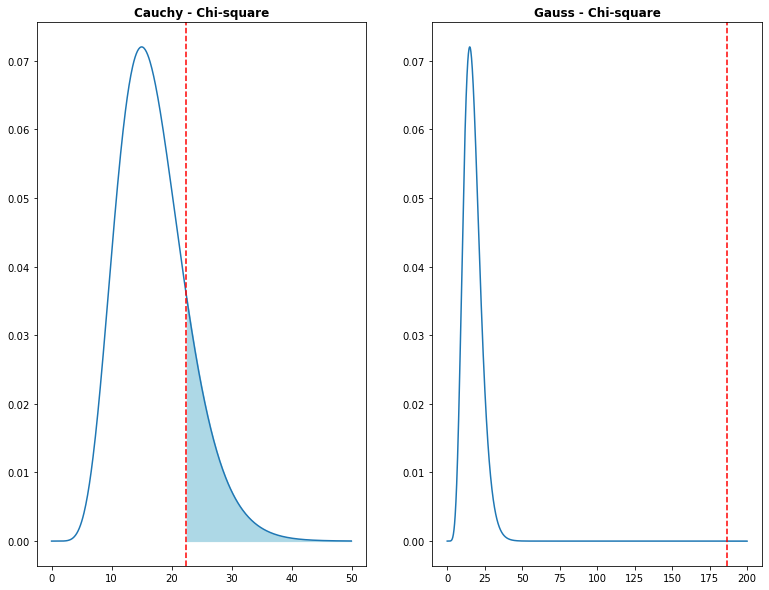

In [13]:
ndof = len(bin_centers) - 1
print(BOLD + "\nDegrees of freedom: " + END + "n =", ndof)

chi2_gauss = np.sum(((counts - gaussian_fit(bin_centers, *popt_gauss))**2) / counts)
pvalue_gauss = 1. - stats.chi2.cdf(chi2_gauss, ndof)
print(BOLD + "\nGauss Fit" + END)
print(BOLD + "=> Chi-square: " + END + " 𝜒^2 = %.2f" %chi2_gauss)
print(BOLD + "=> p-value: " + END + "p = %.4f" %pvalue_gauss)

chi2_cauchy = np.sum(((counts - cauchy_fit(bin_centers, *popt_cauchy))**2) / counts)
pvalue_cauchy = 1. - stats.chi2.cdf(chi2_cauchy, ndof)
print(BOLD + "\nCauchy Fit" + END)
print(BOLD + "=> Chi-square: " + END + " 𝜒^2 = %.2f" %chi2_cauchy)
print(BOLD + "=> p-value: " + END + "p = %.4f" %pvalue_cauchy, "\n\n")


fig, ax = plt.subplots(1, 2, figsize = (13, 10))
x = np.arange(0, 50, 0.1)
ax[0].plot(x, stats.chi2.pdf(x, ndof))
ax[0].axvline(chi2_cauchy, color = "r", linestyle = "--")
ax[0].fill_between(x, stats.chi2.pdf(x, ndof), where = x > chi2_cauchy, color ="lightblue")
ax[0].set_title("Cauchy - Chi-square", weight = "bold")

x = np.arange(0, 200, 0.1)
ax[1].plot(x, stats.chi2.pdf(x, ndof))
ax[1].axvline(chi2_gauss, color = "r", linestyle = "--")
ax[1].fill_between(x, stats.chi2.pdf(x, ndof), where = x > chi2_gauss, color ="lightblue")
ax[1].set_title("Gauss - Chi-square", weight = "bold")
plt.show()

**Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?**
$\newline$ In the case of a cauchy fit the p-value is in fact $p_{value} \simeq 0.17 > 0.05 = \alpha$, so the fit is satisfactory within the decided confidence level $\alpha$.

$\newline$

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [14]:
# ! wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

data = np.loadtxt("munich_temperatures_average_with_bad_data.txt")
data = data[(data[:, 0]>=2008)&(data[:, 0]<=2012)]

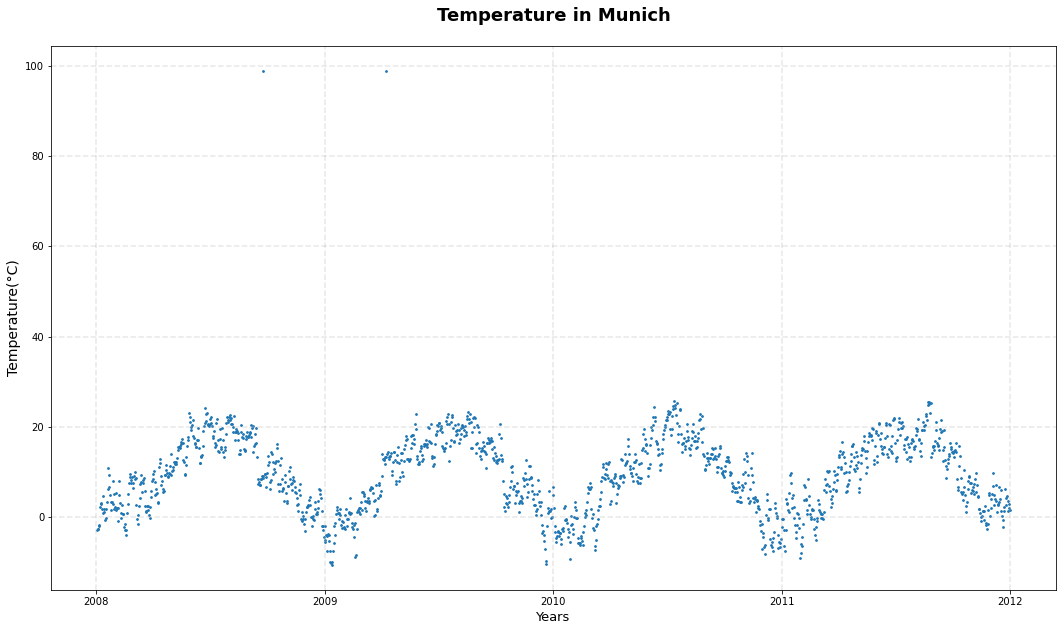

In [15]:
fig, ax = plt.subplots(figsize = (18, 10))
ax.scatter(data[:, 0], data[:, 1], s = 3)
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
ax.set_xlabel("Years", fontsize = 13)
ax.set_ylabel("Temperature(°C)", fontsize = 14)
ax.set_title("Temperature in Munich", fontsize = 18, weight = "bold",  pad = 25)
ax.grid(linestyle = '--', linewidth = 1.5, alpha = 0.3)
plt.show()

In [16]:
data = data[(data[:, 1] < 80)]                     # Filtering no sense temperature



				Three parameter case - f(x)

Fit Parameters

a = -9.96 ± 0.13
b = 12.33 ± 0.01
c = 9.26 ± 0.09


Average Temperatures in Munich (2008-2012)

Data - total average =>  9.261°C
Prediction - total average => 9.261°C
Prediction - typical daily average (T > 15°C) => 17.779°C
Prediction - typical daily average (T < 5°C) => 1.286°C


Sum of the squared residuals: SSR = 18669.515





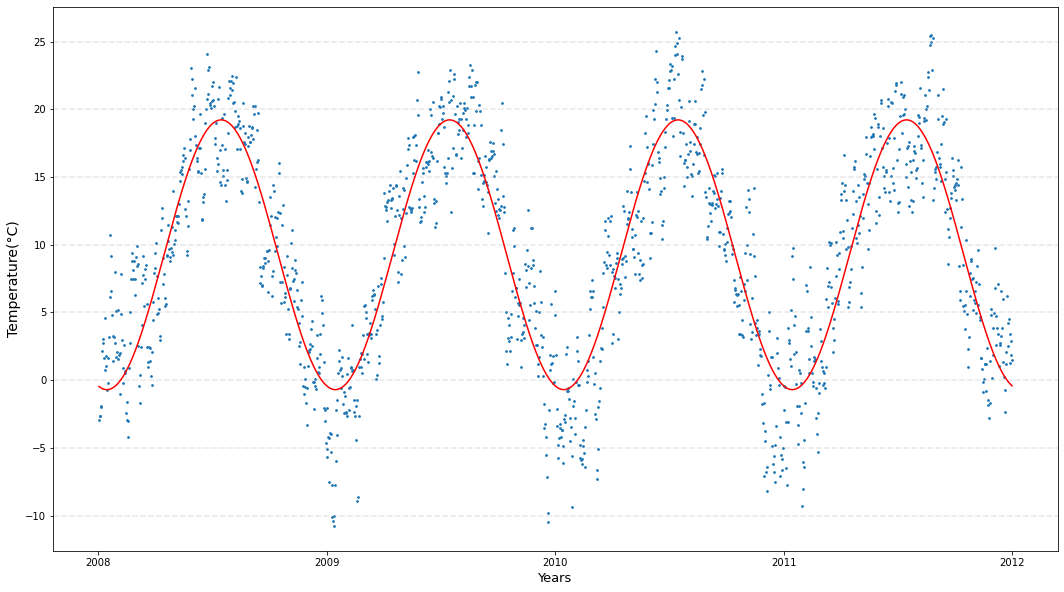

In [17]:
def f(x, a, b, c):
    return a*np.cos(2*np.pi*x + b) + c


popt, pcov = optimize.curve_fit(f, data[:, 0], data[:, 1], method = "lm", full_output = False)
pred = f(data[:, 0], *popt)

print(BOLD + "\n\n\t\t\t\tThree parameter case - f(x)" + END)
print(BOLD + "\nFit Parameters\n" + END)
print(BOLD + "a = "  + END + "%.2f \u00B1 %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print(BOLD + "b = "  + END + "%.2f \u00B1 %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print(BOLD + "c = "  + END + "%.2f \u00B1 %.2f" % (popt[2], np.sqrt(pcov[2,2])))


pred_mean = np.mean(pred)
pred_mean_hot = np.mean(pred[pred > 15])
pred_mean_cold = np.mean(pred[pred < 5])

print(BOLD + "\n\nAverage Temperatures in Munich (2008-2012)\n" + END)
print(BOLD + "Data - total average => " + END + " %.3f°C" %np.mean(data[:, 1]))
print(BOLD + "Prediction - total average =>" + END + " %.3f°C" %pred_mean)
print(BOLD + "Prediction - typical daily average (T > 15°C) =>" + END + " %.3f°C" %pred_mean_hot)
print(BOLD + "Prediction - typical daily average (T < 5°C) =>" + END + " %.3f°C" %pred_mean_cold)


f_ndof = 3 - 1
f_ssr = np.sum((data[:, 1] - pred)**2)
print(BOLD + "\n\nSum of the squared residuals: " + END + "SSR = %.3f" %f_ssr)

print("\n\n")


fig, ax = plt.subplots(figsize = (18, 10))
ax.scatter(data[:, 0], data[:, 1], s = 3)
ax.plot(data[:, 0], pred, c = "r")
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
ax.set_xlabel("Years", fontsize = 13)
ax.set_ylabel("Temperature(°C)", fontsize = 14)
ax.grid(axis = "y", linestyle = '--', linewidth = 1.5, alpha = 0.3)
plt.show()


**What is the meaning of the  𝑏  parameter, and what physical sense does it have?**

$\newline$ The $b$ parameter in $f(t) = a \cos(2\pi t + b)+c$ changes the offset of the function along the x axis. From the physical point of view $b$ describes the periodicity of the flow of season along the year, in particular:
- if b > 0 all temperatures described by $f(t)|_{b=0}$ are shifted to the left
- if b < 0 all temperatures described by $f(t)|_{b=0}$ are shifted to the right




				Four parameter case - g(x)

Fit Parameters:

a = -9.96 ± 0.13
b = 8.62 ± 23.79
c = 9.27 ± 0.10
d = 1.000 ± 0.002


Sum of the squared residuals: SSR = 18669.225





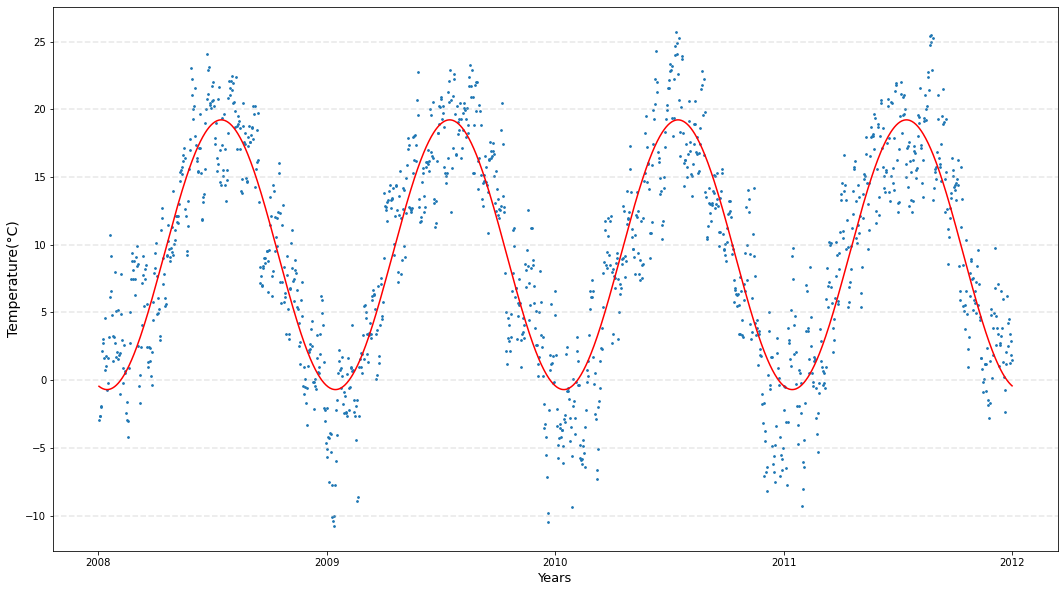

In [18]:
def g(x, a, b, c, d):
    return a*np.cos(2*np.pi*d*x + b) + c

popt, pcov = optimize.curve_fit(g, data[:, 0], data[:, 1], method = "lm", full_output = False)
pred = g(data[:, 0], *popt)

print(BOLD + "\n\n\t\t\t\tFour parameter case - g(x)" + END)
print(BOLD + "\nFit Parameters:\n" + END)
print(BOLD + "a = "  + END + "%.2f \u00B1 %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print(BOLD + "b = "  + END + "%.2f \u00B1 %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print(BOLD + "c = "  + END + "%.2f \u00B1 %.2f" % (popt[2], np.sqrt(pcov[2,2])))
print(BOLD + "d = "  + END + "%.3f \u00B1 %.3f" % (popt[3], np.sqrt(pcov[3,3])))


g_ndof = 4 - 1
g_ssr = np.sum((data[:, 1] - pred)**2)
print(BOLD + "\n\nSum of the squared residuals: " + END + "SSR = %.3f" %g_ssr)

print("\n\n")


fig, ax = plt.subplots(figsize = (18, 10))
ax.scatter(data[:, 0], data[:, 1], s = 3)
ax.plot(data[:, 0], pred, c = "r")
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
ax.set_xlabel("Years", fontsize = 13)
ax.set_ylabel("Temperature(°C)", fontsize = 14)
ax.grid(axis = "y", linestyle = '--', linewidth = 1.5, alpha = 0.3)
plt.show()

In [19]:
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose = False):
    
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    
    if verbose:
        print(BOLD + "Confidence Level: " + END + "CL = %.3f" % CL) 
        print(BOLD + "\t      => Is the additional parameter necessary?" + END, "YES\n" if CL < 0.10 else "NO\n")
    return CL


N = len(data[:, 0])
print(BOLD + "\nFisher F-test =>" + END, end = " ")
CL = Ftest(f_ssr, g_ssr, f_ndof, g_ndof, N, verbose = True)


Fisher F-test => Confidence Level: CL = 0.880
	      => Is the additional parameter necessary? NO



**Use the Fisher F-test to determine whether the additional parameter is necessary**
$\newline$ Indeed the additional parameter is not necessary: the confidence level is $CL > 0.10\%$ so then there's not a significative difference between the two fits.
This result was expected because we obtained an additional parameter $d = 1.000 ± 0.002$ which don't introduce great changes respect to the $f(t)$ fit model.